<a href="https://colab.research.google.com/github/ehsan74814/Preprocessing_Data/blob/main/logisticRegression_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Data exploration**

### 1.0) importing Packasges

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

### 1.1) getting data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Training ML/logisticRegression/winequalityN.copy.csv")

In [4]:
df = df.drop(columns='type', axis=1)

In [72]:
correlation_matrix = df.corr()

In [ ]:
mask =np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,mask= mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True )
plt.show()

In [5]:
df = df.drop(columns='free sulfur dioxide', axis=1)

In [6]:
df = df.drop(columns='density', axis=1)

### 1.2) About Data

In [ ]:
df.info()

### 1.3) First 5 Rows

In [ ]:
df.head()

In [ ]:
df['quality'].value_counts()

In [ ]:
df['quality'].value_counts()

# **2) Checking for NULL values**

In [ ]:
df.isnull().sum()

In [ ]:
sum = df.isnull().sum()
pd.concat([sum], axis=1, keys=["Sum"])  #.sort_values(by='Sum', ascending=False)

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df[df['fixed acidity'].isnull()]

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
df.info()

## **2.0) filling of the row data**

In [7]:
df = df.fillna(df.mean())

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# **3) outliner**

In [ ]:
plt.figure(figsize=(15,12))
df.boxplot(vert=False,widths=0.7, patch_artist=True, notch=True, color='red')
plt.xlim(0,200)
plt.show()

In [9]:
features = df.drop(columns=['quality'])
target = df['quality']

In [10]:
q1 = features.quantile(0.25)
q3 = features.quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 +  1.5*IQR

features = features[(features >=lower_bound) & (features <=upper_bound)]

In [11]:
df = pd.concat([features, target], axis=1)

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(15,12))
df.boxplot(vert=False,widths=0.7, patch_artist=True, notch=True, color='red')
plt.xlim(0,200)
plt.show()

In [ ]:
df.isnull().sum()

In [12]:
df = df.fillna(df.mean())

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(15,12))
df.boxplot(vert=False,widths=0.7, patch_artist=True, notch=True, color='red')
plt.xlim(0,200)
plt.show()

# model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
X = df.drop(columns=['quality'])
y = df['quality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

In [18]:
y_pred = pipeline.predict(X_test)

In [31]:
from sklearn.metrics import (accuracy_score, precision_score,classification_report,
                             recall_score, f1_score,
                             roc_auc_score, log_loss,
                             confusion_matrix, balanced_accuracy_score,
                             make_scorer)

In [20]:
f'accuracy : {accuracy_score(y_test, y_pred)*100:.2f}'

'accuracy : 51.69'

In [ ]:
print(classification_report(y_test, y_pred))

In [21]:
precision_score(y_test, y_pred, average='weighted')

0.4772439600802064

In [22]:
recall_score(y_test, y_pred, average='weighted')

0.5169230769230769

In [23]:
f1_score(y_test, y_pred, average='weighted')

0.4738367588273309

In [ ]:
y_pred_probe = pipeline.predict_proba(X_test)
roc_auc_score(y_test, y_pred, multi_class='ovr')

In [ ]:
print(confusion_matrix(y_test, y_pred))

# diagram

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [26]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
pipeline.fit(X_train_pca, y_train)

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

In [28]:
x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


z =pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

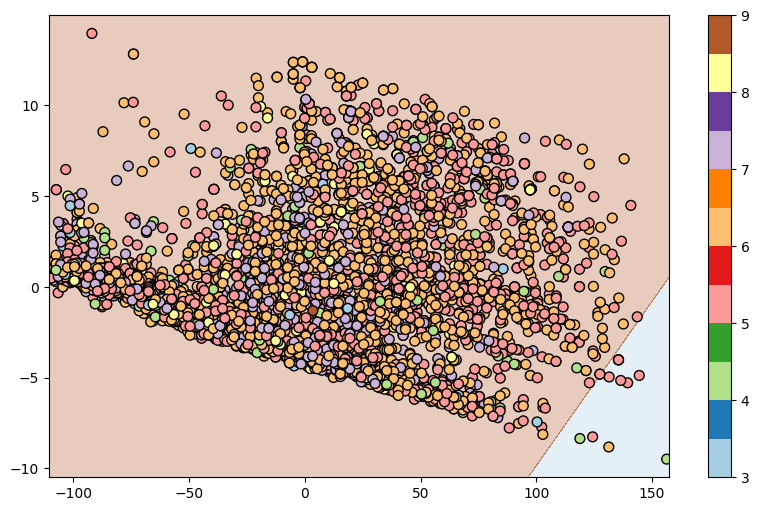

In [29]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train,cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.colorbar()
plt.show()